In [7]:

from math import sqrt
import numpy as np
import cvxpy as cp
from PEPit import PEP
from PEPit.operators import LipschitzStronglyMonotoneOperator

# local comparison

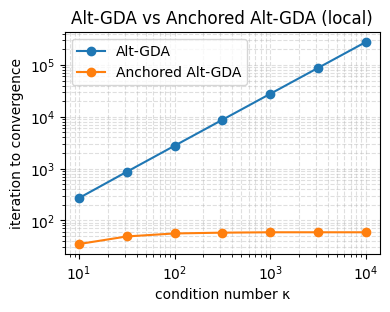

<Figure size 640x480 with 0 Axes>

In [9]:

import numpy as np
import matplotlib.pyplot as plt


# def rho_sim(kappa: float) -> float:
#     mu = 1.0 / kappa        
#     B  = 1.0              
#     eta = mu / (mu**2 + B**2)    

#     eig = 1 - eta * mu+ 0j       
#     return abs(eig)

def rho_alt(kappa):

    mu = 1.0 / kappa
    B  = 1.0
    alpha = beta = 0.5     

    J = np.array([[1 - alpha*mu,      -alpha*B],
                  [beta*B*(1 - alpha*mu),
                   1 - beta*mu - alpha*beta*B**2]])
    return max(abs(np.linalg.eigvals(J)))


def rho_alt_anchored(t,kappa):

    mu = 1.0 / kappa
    B  = 1.0
    gamma = 1/k
    alpha = beta = 0.5       # α = β = 1/(2L) with L = 1
    
    J = np.array([[(1-gamma) - alpha,      -alpha*B],
                  [beta*B*((1-gamma) - alpha*mu),
                   (1-gamma) - beta*mu - alpha*beta*B**2]])
    return max(abs(np.linalg.eigvals(J)))


def iterations_to_eps(rho, eps: float = 1e-6) -> int:
    return int(np.ceil(np.log(eps) / np.log(rho)))

kappas = np.logspace(1, 4, 7)  
gamma = 0 
it_sim, it_alt, it_anchored_alt = [], [], []

for k in kappas:
    # it_sifafe
    it_alt.append(iterations_to_eps(rho_alt(k)))
    it_anchored_alt.append(iterations_to_eps(rho_alt_anchored(1,k)))

plt.figure(figsize=(4,3))
# plt.loglog(kappas, it_sim, 'o-', label='Sim-GDA')
plt.loglog(kappas, it_alt, 'o-', label='Alt-GDA')
plt.loglog(kappas, it_anchored_alt, 'o-', label=f'Anchored Alt-GDA')
plt.xlabel('condition number κ')
plt.ylabel('iteration to convergence')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.title('Alt-GDA vs Anchored Alt-GDA (local)')
plt.show()

plt.savefig("alt_vs_anchored_altf.png")



# global comparison

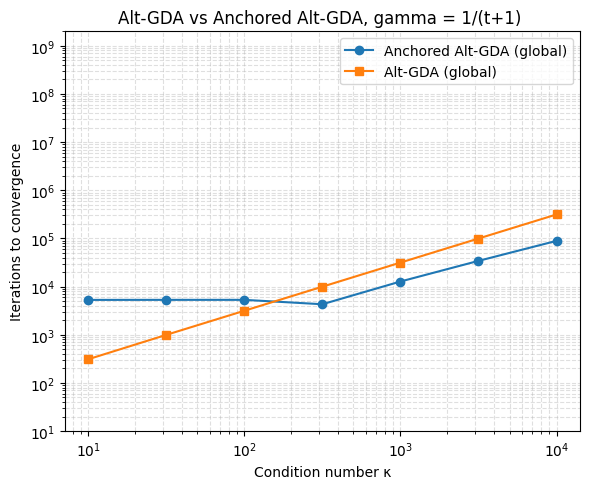

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def anchored_alt_gda(mu, gamma, eta, x0, y0, tol=1e-6, max_iters=100000000):
    x, y = x0, y0


    for t in range(max_iters):
        gamma = 1/(t+1)
        x_prev, y_prev = x, y
        x = x - eta * (mu * x + y) - gamma * (x-x0)
        y = y + eta * (x - mu * y) - gamma * (y-y0)
        # y = y + eta * (x - mu * y) - ga * (y-y0)
        # x = x - eta * (mu * x + y)
        # y = y + eta * (x - mu * y)
        if np.sqrt((x - x_prev)**2 + (y - y_prev)**2) < tol:
            return t
    return max_iters

def alt_gda(mu, eta, x0, y0, tol=1e-6, max_iters=100000000):
    x, y = x0, y0
    for t in range(max_iters):
        x_prev, y_prev = x, y
        x = x - eta * (mu * x + y)
        y = y + eta * (x - mu * y)
        if np.sqrt((x - x_prev)**2 + (y - y_prev)**2) < tol:
            return t 
    return max_iters


kappas = np.logspace(1, 4, 7)  

gamma = 0.2
eta = 0.5
initial_point = (10.0, -10.0)

iterations_anchored = []
iterations_alt = []

for kappa in kappas:
    mu = 1.0 / kappa

    iters_anchored = anchored_alt_gda(mu, gamma, eta, *initial_point)
    iters_alt = alt_gda(mu, eta, *initial_point)

    iterations_anchored.append(iters_anchored)
    iterations_alt.append(iters_alt)

plt.figure(figsize=(6, 5))
plt.loglog(kappas, iterations_anchored, 'o-', label='Anchored Alt-GDA (global)')
plt.loglog(kappas, iterations_alt, 's-', label='Alt-GDA (global)')
plt.xlabel('Condition number κ')
plt.ylabel('Iterations to convergence')
plt.title('Alt-GDA vs Anchored Alt-GDA, gamma = 1/(t+1) ')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.ylim(10, 2e9)
plt.tight_layout()
plt.show()

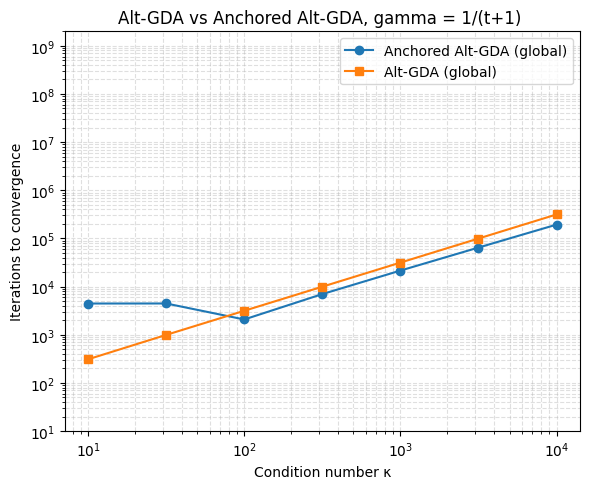

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def anchored_alt_gda(mu, gamma, eta, x0, y0, tol=1e-6, max_iters=100000000):
    x, y = x0, y0


    for t in range(max_iters):
        gamma = 1/(t+1)
        # gamma = 0.2.

        x_prev, y_prev = x, y
        # x = x - eta * (mu * x + y) - gamma * (x-x0)
        x = x - eta * (mu * x + y)
        y = y + eta * (x - mu * y) - gamma * (y-y0)
        # y = y + eta * (x - mu * y) - ga * (y-y0)
        # x = x - eta * (mu * x + y)
        # y = y + eta * (x - mu * y)
        if np.sqrt((x - x_prev)**2 + (y - y_prev)**2) < tol:
            return t
    return max_iters

def alt_gda(mu, eta, x0, y0, tol=1e-6, max_iters=100000000):
    x, y = x0, y0
    for t in range(max_iters):
        x_prev, y_prev = x, y
        x = x - eta * (mu * x + y)
        y = y + eta * (x - mu * y)
        if np.sqrt((x - x_prev)**2 + (y - y_prev)**2) < tol:
            return t 
    return max_iters


kappas = np.logspace(1, 4, 7)  

gamma = 0.2
eta = 0.5
initial_point = (10.0, -10.0)

iterations_anchored = []
iterations_alt = []

for kappa in kappas:
    mu = 1.0 / kappa

    iters_anchored = anchored_alt_gda(mu, gamma, eta, *initial_point)
    iters_alt = alt_gda(mu, eta, *initial_point)

    iterations_anchored.append(iters_anchored)
    iterations_alt.append(iters_alt)

plt.figure(figsize=(6, 5))
plt.loglog(kappas, iterations_anchored, 'o-', label='Anchored Alt-GDA (global)')
plt.loglog(kappas, iterations_alt, 's-', label='Alt-GDA (global)')
plt.xlabel('Condition number κ')
plt.ylabel('Iterations to convergence')
plt.title('Alt-GDA vs Anchored Alt-GDA, gamma = 1/(t+1) ')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.ylim(10, 2e9)
plt.tight_layout()
plt.show()

# non-quadratic example 1

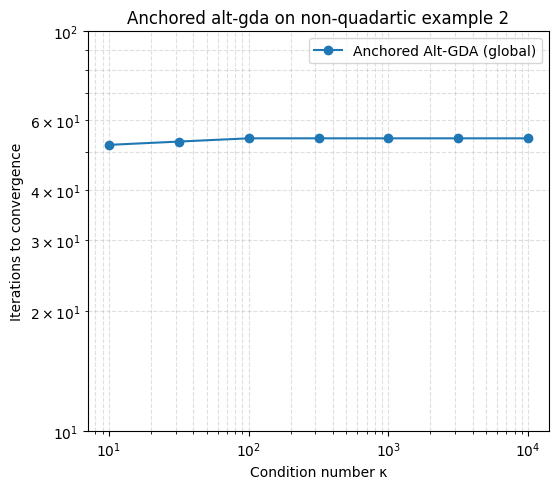

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def anchored_alt_gda_cosh(mu, gamma, eta, x0, y0, tol=1e-6, max_iters=100000):
    x, y = x0, y0
    for t in range(max_iters):
        x_prev, y_prev = x, y
        grad_x = mu / 2 * np.sinh(x) + y
        x = x - eta * grad_x - gamma * (x - x0)
        grad_y = x - mu / 2 * np.sinh(y)
        y = y + eta * grad_y - gamma * (y - y0)
        if np.linalg.norm([x - x_prev, y - y_prev]) < tol:
            return t
    return max_iters

kappas = np.logspace(1, 4, 7)  

gamma = 0.2
eta = 0.1
initial_point = (1.0, -1.0)

iterations_anchored = []
iterations_alt = []

for kappa in kappas:
    mu = 1.0 / kappa
    iters_anchored = anchored_alt_gda_cosh(mu, gamma, eta, *initial_point)
    # iters_alt = alt_gda(mu, eta, *initial_point)
    iterations_anchored.append(iters_anchored)
    # iterations_alt.append(iters_alt)

plt.figure(figsize=(6, 5))
plt.loglog(kappas, iterations_anchored, 'o-', label='Anchored Alt-GDA (global)')
# plt.loglog(kappas, iterations_alt, 's-', label='Alt-GDA (global)')
plt.xlabel('Condition number κ')
plt.ylabel('Iterations to convergence')
plt.title('Anchored alt-gda on non-quadartic example 2')

plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.ylim(10,1e2)
plt.show()


# Non-quadratic example 2

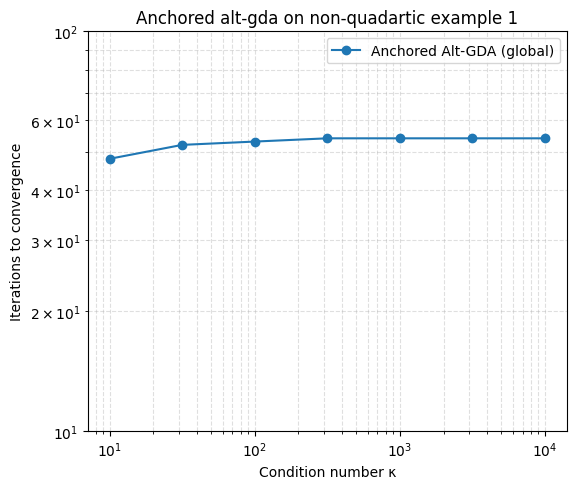

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def anchored_alt_gda_quartic(mu, gamma, eta, x0, y0, tol=1e-6, max_iters=100000):
    x, y = x0, y0
    for t in range(max_iters):
        x_prev, y_prev = x, y
        
        grad_x = mu * x**3 + y
        x = x - eta * grad_x - gamma * (x - x0)

        grad_y = x - mu * y**3
        y = y + eta * grad_y - gamma * (y - y0)

        if np.linalg.norm([x - x_prev, y - y_prev]) < tol:
            return t
    return max_iters


kappas = np.logspace(1, 4, 7)  

gamma = 0.2
eta = 0.1
initial_point = (1.0, -1.0)

iterations_anchored = []
iterations_alt = []

for kappa in kappas:
    mu = 1.0 / kappa
    iters_anchored = anchored_alt_gda_quartic(mu, gamma, eta, *initial_point)
    # iters_alt = alt_gda(mu, eta, *initial_point)
    iterations_anchored.append(iters_anchored)
    iterations_alt.append(iters_alt)

plt.figure(figsize=(6, 5))
plt.loglog(kappas, iterations_anchored, 'o-', label='Anchored Alt-GDA (global)')
# plt.loglog(kappas, iterations_alt, 's-', label='Alt-GDA (global)')
plt.xlabel('Condition number κ')
plt.ylabel('Iterations to convergence')
plt.title('Anchored alt-gda on non-quadartic example 1')

plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.ylim(10,1e2)
plt.show()
